### Análisis de Criptomonedas
#### Datos de estudio:
- Fecha: Fecha de observación del precio 00:00:00 horas.
- Precio: Precio por fecha y hora.
- Volumen de transacciones: Cantidad de transacciones por día.
- Precio (market_cap): Precio de las criptomonedas en el mercado con relación
al USD.
- Nombre de la moneda.
##### Fuente:
- https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrency-historical-prices-
coingecko

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

#### Concatenacion de Datasets

In [3]:
data_folder = "Datasets"

crypto_files = [
    "bitcoin.csv",
    "solana.csv",
    "binancecoin.csv",
    "cardano.csv",
    "avalanche-2.csv",
    "tether.csv",
    "shiba-inu.csv",
    "usd-coin.csv",
    "dai.csv",
    "ethereum.csv"
]

all_data = []

for crypto_file in crypto_files:
    filepath = os.path.join(data_folder, crypto_file)

    df = pd.read_csv(filepath)

    all_data.append(df)

combined_df = pd.concat(all_data, ignore_index=True)

output_file = "crypto.csv"
combined_df.to_csv(output_file, index=False)

print(f"Archivo {output_file} creado correctamente.")




Archivo crypto.csv creado correctamente.


#### Formateo de la columna Date

In [4]:
df = pd.read_csv('crypto.csv')

def clear_dates(str_date):
    if len(str_date) > 10:
        return str_date[:10]
    else:
        return str_date
    
df['date'] = df['date'].apply(clear_dates)

df.to_csv('crypto.csv', index=False)

#### Eliminación de Valores Nulos

In [5]:
df = pd.read_csv('crypto.csv')

df = df.dropna(axis=0, inplace=True)
print('done')

done


#### Seteo de Fechas en Orden Ascendente

In [6]:
df = pd.read_csv('crypto.csv')

df['date'] = pd.to_datetime(df['date'])

df.sort_values('date', inplace=True)
df.to_csv('crypto.csv', index=False)

print(df.head(10))


        date     price  total_volume    market_cap coin_name
0 2015-01-01  313.9920  4.699936e+07  4.293958e+09   bitcoin
1 2015-01-02  314.4460  3.885591e+07  4.301448e+09   bitcoin
2 2015-01-03  286.5720  1.187789e+08  3.921358e+09   bitcoin
3 2015-01-04  260.9360  2.055001e+08  3.571640e+09   bitcoin
4 2015-01-05  273.2200  1.550381e+08  3.740880e+09   bitcoin
5 2015-01-06  285.3738  9.700290e+07  3.908408e+09   bitcoin
6 2015-01-07  295.8725  1.106742e+08  4.053239e+09   bitcoin
7 2015-01-08  284.4525  8.657054e+07  3.897824e+09   bitcoin
8 2015-01-09  289.5738  8.347840e+07  3.968993e+09   bitcoin
9 2015-01-10  274.5330  9.268384e+07  3.763909e+09   bitcoin


#### Volumen de Capitalización.
- Volumen de Datos en comparación del Valor o Capitalización en dólares para el mercado, intentando analizar el comportamiento proporcional entre ambos.

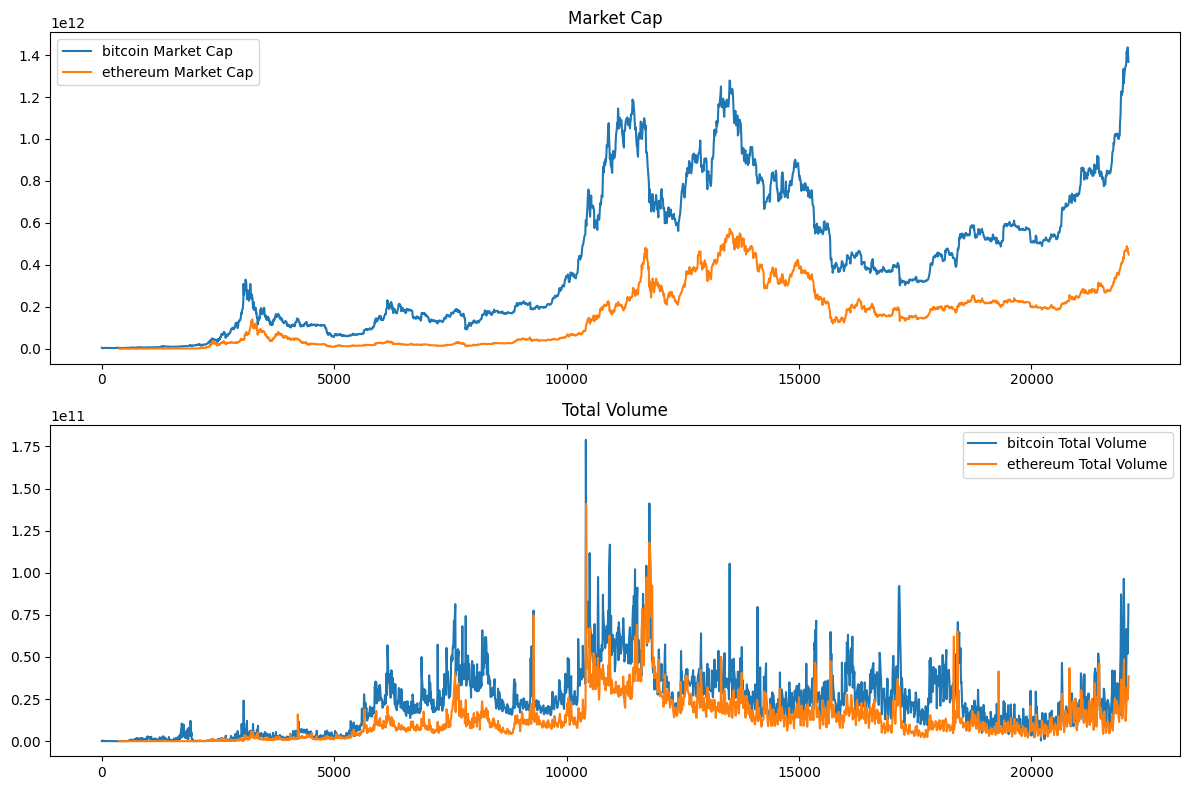

In [7]:
df = pd.read_csv('crypto.csv')

cryptos = ['bitcoin', 'ethereum']
df_filtered = df[df['coin_name'].isin(cryptos)]

fig, axs = plt.subplots(2, 1, figsize=(12, 8))

for crypto in cryptos:
    crypto_data = df_filtered[df_filtered['coin_name'] == crypto]
    x = crypto_data.index.values
    y = crypto_data['market_cap']
    z = crypto_data['total_volume']

    axs[0].plot(x, y, label=f'{crypto} Market Cap')
    axs[1].plot(x, z, label=f'{crypto} Total Volume')

axs[0].set_title('Market Cap')
axs[0].legend()

axs[1].set_title('Total Volume')
axs[1].legend()

plt.tight_layout()
plt.show()


#### Preprocesado  de Datos.

- Preprocesado de datos identificando los valores faltantes o nulos, su corrección, y el cambio del tipo de datos (astype); además con el comando str.upper() poner los index en mayúsculas, separar por grupos (usar comando groupby) dependiendo del valor de mercado en la fecha 1 de Enero de 2015 y organizarlos por valor ascendente.

##### Valores nulos por columna

In [8]:
df = pd.read_csv('crypto.csv')

null_values = df.isnull().sum()

print(f'Total de valores nulos por columna: {null_values}')

Total de valores nulos por columna: date            0
price           0
total_volume    0
market_cap      2
coin_name       0
dtype: int64


##### Se completan los campos nulos con la media.

In [9]:
mean = df['market_cap'].mean()
df['market_cap'] = df['market_cap'].fillna(mean)
null_values = df.isnull().sum()
df.to_csv('crypto.csv', index=False)
print(f'Total de valores nulos por columna: {null_values}')

Total de valores nulos por columna: date            0
price           0
total_volume    0
market_cap      0
coin_name       0
dtype: int64


##### Se cambia el tipo de datos de la columna 'date' y 'coin_name'

In [10]:
df = pd.read_csv('crypto.csv')

print(f'Cambio del tipo de datos del DataFrame. \n\n Antes del cambio:\n {df.dtypes}\n')

# Conversion de la columna fecha de 'object' a 'datetime'
df['date'] = pd.to_datetime(df['date'])
#df['date'] = df['date'].astype('date64[pyarrow]')

# Conversion de la columna coin_name de 'object' a 'str'
df['coin_name'] = df['coin_name'].astype(str)

print(f'Después del cambio:\n {df.dtypes}\n')

df.to_csv('crypto.csv', index=False)

Cambio del tipo de datos del DataFrame. 

 Antes del cambio:
 date             object
price           float64
total_volume    float64
market_cap      float64
coin_name        object
dtype: object

Después del cambio:
 date            datetime64[ns]
price                  float64
total_volume           float64
market_cap             float64
coin_name               object
dtype: object



##### Se establece como índice la columna 'coin_name' y se utiliza el método str.upper() sobre la misma.

In [11]:
df = pd.read_csv('crypto.csv')

df.set_index('coin_name', inplace=True)
df.index = df.index.str.upper()

df.to_csv('crypto.csv')

print(df.head(5))

                 date    price  total_volume    market_cap
coin_name                                                 
BITCOIN    2015-01-01  313.992  4.699936e+07  4.293958e+09
BITCOIN    2015-01-02  314.446  3.885591e+07  4.301448e+09
BITCOIN    2015-01-03  286.572  1.187789e+08  3.921358e+09
BITCOIN    2015-01-04  260.936  2.055001e+08  3.571640e+09
BITCOIN    2015-01-05  273.220  1.550381e+08  3.740880e+09


##### Se separa por grupos dependiendo del valor de mercado en la fecha 1 de Enero de 2015 organizandolos de manera ascendente.

In [12]:
df = pd.read_csv('crypto.csv')

df = df[df['date'] == '2015-01-01']
df = df.sort_values('market_cap')

print(df.head(5))

  coin_name        date    price  total_volume    market_cap
0   BITCOIN  2015-01-01  313.992  4.699936e+07  4.293958e+09


#### Top 3 Criptomonedas con su Precio en 2015.

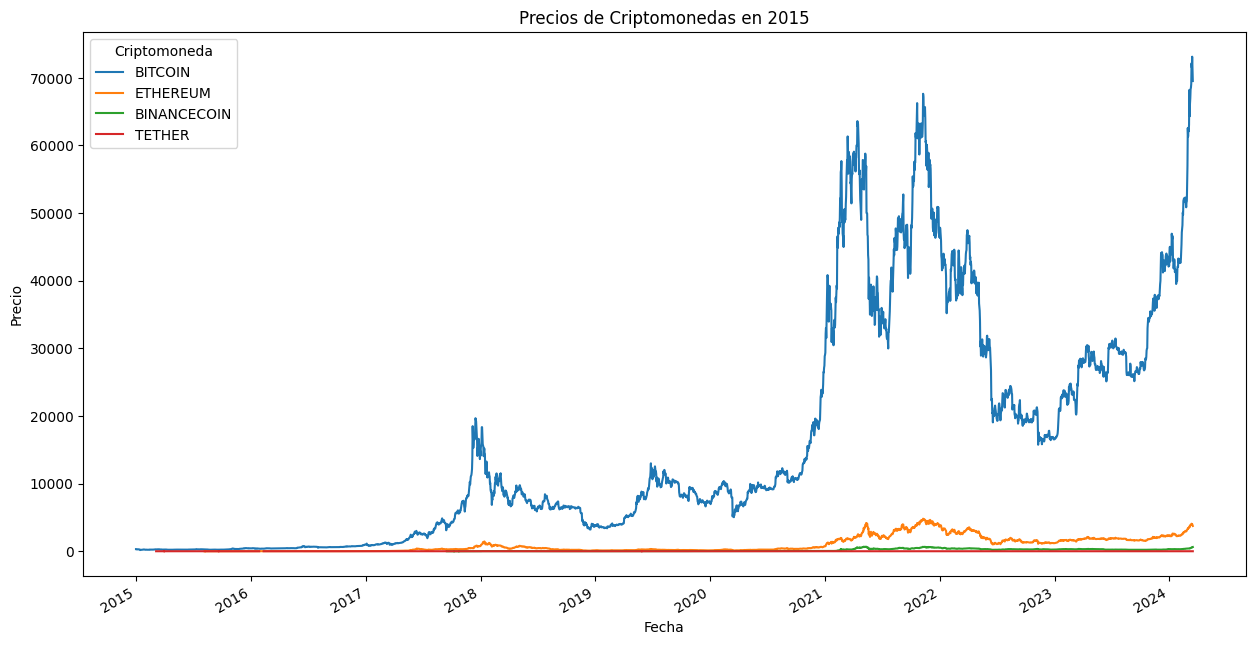

In [13]:
df = pd.read_csv('crypto.csv')
df['date'] = pd.to_datetime(df['date'])
df_2024 = df[df['date'].dt.year == 2024]

df_filtered = df_2024[df_2024['coin_name'].isin(cryptos)]

cryptos_mean = df_filtered.groupby('coin_name')['price'].mean()

pivot_df = df.pivot(index='date', columns='coin_name', values='price')
cryptos_deseados = ['BITCOIN', 'ETHEREUM', 'BINANCECOIN', 'TETHER']
pivot_df_filtrado = pivot_df[cryptos_deseados]

pivot_df_filtrado.plot(figsize=(15, 8), title='Precios de Criptomonedas en 2015')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend(title='Criptomoneda')
plt.show()

# for crypto in cryptos:
#     #crypto_data = df_filtered[df_filtered['coin_name'] == crypto]
#     pivot_data = pivot_df[pivot_df[crypto]]
#     x = pivot_data['date']
#     y = pivot_data['price'] #/ cryptos_mean[crypto]

#     ax.plot(x, y, label=f'{crypto} Price')

# ax.set_title('Comparación Precio de las Criptomonedas')
# ax.legend()

# print(df_filtered.head())

# plt.tight_layout()
# plt.show()

#### Media de las criptomonedas en 2015 y la menor desviación estándar entre ellas.

In [14]:
df = pd.read_csv('crypto.csv')

df['date'] = pd.to_datetime(df['date'])
df_2015 = df[df['date'].dt.year == 2015]

cryptos = ['BITCOIN', 'TETHER', 'ETHEREUM'] 
df_filtered = df_2015[df_2015['coin_name'].isin(cryptos)]

print(f'Criptomonedas activas en el año 2015: {df_2015["coin_name"].unique()}\n')

# Media de las criptomonedas
crypto_mean = df_2015.groupby('coin_name')['price'].mean()
print(f'Media de las criptomonedas del 2015: {crypto_mean}')

# Desviación estándar
crypto_desv = df_2015.groupby('coin_name')['price'].std()
print(f'\nDesviación estándar de las criptomonedas del 2015: {crypto_desv}')

# Criptomoneda con la desviación estándar más baja
crypto_min_desv = crypto_desv.idxmin()
print(f'\nDesviación estándar más baja de las criptomonedas del 2015: {crypto_min_desv}')


Criptomonedas activas en el año 2015: ['BITCOIN' 'TETHER' 'ETHEREUM']

Media de las criptomonedas del 2015: coin_name
BITCOIN     272.283709
ETHEREUM      0.948275
TETHER        0.999278
Name: price, dtype: float64

Desviación estándar de las criptomonedas del 2015: coin_name
BITCOIN     59.304438
ETHEREUM     0.301923
TETHER       0.027492
Name: price, dtype: float64

Desviación estándar más baja de las criptomonedas del 2015: TETHER


#### Criptomonedas por encima de la media.

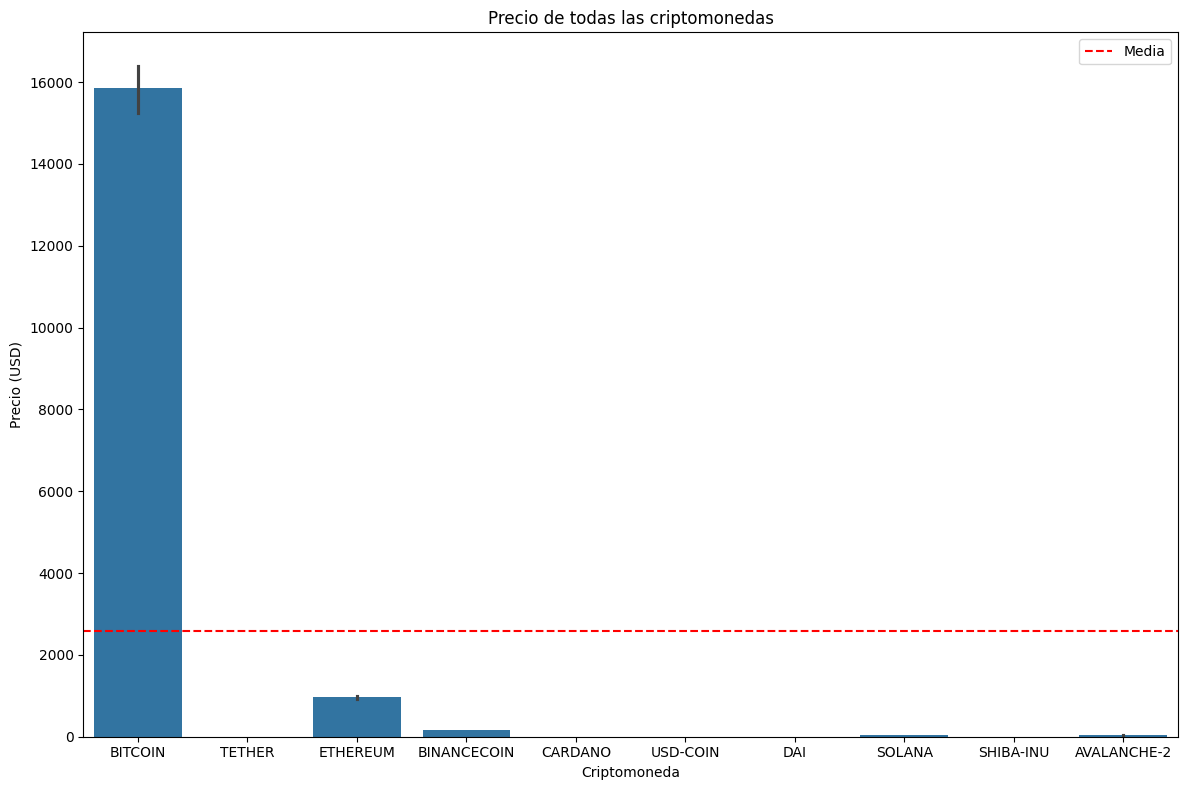

In [15]:
mean_price = df['price'].mean()
df["media"] = mean_price

# Crear el lienzo
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar
sns.barplot(x="coin_name", y="price", data=df)

# Agregar línea de la media
plt.axhline(y=mean_price, color="red", linestyle="dashed", label="Media")

# Personalizar
plt.title("Precio de todas las criptomonedas")
plt.xlabel("Criptomoneda")
plt.ylabel("Precio (USD)")
plt.legend()
plt.tight_layout()
plt.show()

##### Criptomoneda con Media más Alta.

In [16]:
df = pd.read_csv('crypto.csv')

total_mean = df['price'].mean()

above_mean_cryptos = df.groupby('coin_name')['price'].mean().loc[lambda x: x > total_mean]

for crypto, mean in above_mean_cryptos.items():
    print(f"Criptomoneda con Media más alta: {crypto}, Media: {mean}")


Criptomoneda con Media más alta: BITCOIN, Media: 15844.70104052854


##### Mayor valor en el mercado en los últimos 3 meses de diciembre.

In [17]:
df = pd.read_csv('crypto.csv')

df['date'] = pd.to_datetime(df['date'])

quarter = df.query('date.dt.year == 2015 and date.dt.month >= 10')

crypto_max_value = quarter.groupby('coin_name')['price'].max()

max_crypto = crypto_max_value.nlargest(5)

print(f'Criptomonedas con mayor valor en los últimos 3 meses de 2015: {max_crypto}')

Criptomonedas con mayor valor en los últimos 3 meses de 2015: coin_name
BITCOIN     464.999000
ETHEREUM      1.163749
TETHER        1.000130
Name: price, dtype: float64


##### Se determina la criptomoneda más volátil del 2015

In [18]:
volatile = df_2015.groupby('coin_name')['price'].apply(lambda x: x.max() - x.min())

crypto_max_volatile = volatile.idxmax()
max_volatile = volatile.max()

print(f'La criptomoneda más volátil de 2015 fue: {crypto_max_volatile}, con una fluctuación de: {max_volatile}')

La criptomoneda más volátil de 2015 fue: BITCOIN, con una fluctuación de: 292.8510999999999


#### Se determina la criptomoneda más estable del 2015.

In [19]:
crypto_desv = df_2015.groupby('coin_name')['price'].std()

stable_crypto = crypto_desv.idxmin()
min_crypto_desv = crypto_desv.min()

print(f'La criptomoneda más estable de 2015 fue: {stable_crypto}, con una desviación estándar de: {min_crypto_desv}')

La criptomoneda más estable de 2015 fue: TETHER, con una desviación estándar de: 0.0274923451190119
